**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**SUPERVISED MACHINE LEARNING: EXERCÍCIOS ADICIONAIS**<br>
**Prof. Dr. Wilson Tarantim Junior**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>


*coding: utf-8*

In [2]:
# #%% Instalando os pacotes necessários

# !pip install pandas
# !pip install numpy
# !pip install statsmodels
# !pip install matplotlib
# !pip install -U seaborn
# !pip install pingouin
# !pip install scipy

In [3]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP,ZeroInflatedPoisson
import warnings
warnings.filterwarnings('ignore')

In [5]:
#%% Importando o banco de dados

acidentes = pd.read_excel('data/acidentes.xlsx')
## Fonte: Fávero e Belfiore (2024) Manual de Análise de Dados, Capítulo 14

acidentes.head(3)

,acidentes,pop,idade,leiseca
0,7,0.760693,49.51,0
1,0,1.433687,51.93,0
2,0,0.737124,60.00,0


OBS:
- acidentes por semana 
- população em milhão

In [6]:
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   acidentes  100 non-null    int64  
 1   pop        100 non-null    float64
 2   idade      100 non-null    float64
 3   leiseca    100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [8]:
#%% Estatísticas descritivas

# Variáveis métricas
print(acidentes[['acidentes', 'pop', 'idade']].describe(), '\n')

# Variável categórica
print(acidentes['leiseca'].value_counts())

        acidentes         pop      idade
count  100.000000  100.000000  100.00000
mean     3.010000    1.774185   50.12270
std      6.557431    0.769494    7.69488
min      0.000000    0.650289   24.00000
25%      0.000000    1.353586   47.77250
50%      0.000000    1.463477   51.75500
75%      3.000000    2.300476   54.94750
max     33.000000    2.867504   61.00000 

leiseca
0    58
1    42
Name: count, dtype: int64


In [9]:
# Tabela de frequências de Y
acidentes['acidentes'].value_counts().sort_index()

acidentes
0     58
1      8
2      6
3      6
4      4
5      3
6      2
7      1
8      2
9      2
10     1
14     1
16     1
20     1
25     1
30     1
31     1
33     1
Name: count, dtype: int64

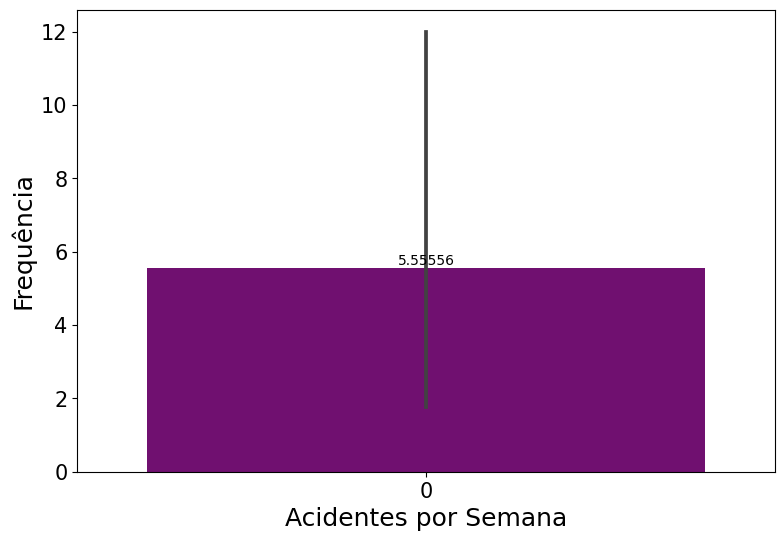

In [11]:
#%% Histograma da variável dependente

plt.figure(figsize=(9,6))
ax = sns.barplot(data = acidentes['acidentes'].value_counts().sort_index(), color='purple')
ax.bar_label(ax.containers[0])
plt.xlabel('Acidentes por Semana', fontsize=18)
plt.ylabel('Frequência', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [12]:
#%% Comparação média x variância da variável dependente

print(f"Média: {round(acidentes['acidentes'].mean(), 2)}")
print(f"Variância: {round(acidentes['acidentes'].var(), 2)}")

# Variância consideravelmente maior do que a média!

Média: 3.01
Variância: 43.0


In [13]:
#%% Organização dos dados para os modelos "zero inflated"

## É necessária a separação entre os componentes (contagem e zero inflated)

# Variável dependente
y = acidentes['acidentes']

# Variáveis preditoras: componente de contagem
x1 = acidentes['pop']
X1 = sm.add_constant(x1)

# Variáveis preditoras: componente logit (zero inflated)
x2 = acidentes[['idade', 'leiseca']]
X2 = sm.add_constant(x2)

In [14]:
#%% Modelo Zero Inflated Poisson 

# Estimando o modelo
modelo_zip = sm.ZeroInflatedPoisson(y, X1, exog_infl=X2,
                                    inflation='logit').fit()

# Parâmetros do modelo
print(modelo_zip.summary())

         Current function value: 2.560484
         Iterations: 35
         Function evaluations: 67
         Gradient evaluations: 67
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               acidentes   No. Observations:                  100
Model:             ZeroInflatedPoisson   Df Residuals:                       98
Method:                            MLE   Df Model:                            1
Date:                 Mon, 07 Oct 2024   Pseudo R-squ.:                  0.1343
Time:                         20:46:08   Log-Likelihood:                -256.05
converged:                       False   LL-Null:                       -295.79
Covariance Type:             nonrobust   LLR p-value:                 4.877e-19
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
inflate_const     -11.7276      3.029     -3.872      0.00

In [17]:
# Valores preditos pelo modelo para observações da amostra
acidentes['poisson_zi'] = modelo_zip.predict(X1, exog_infl=X2)

acidentes.head(3)

,acidentes,pop,idade,leiseca,poisson_zi
0,7,0.760693,49.51,0,2.389142
1,0,1.433687,51.93,0,2.660389
2,0,0.737124,60.00,0,0.529565


In [18]:
#%% Modelo Poisson (comparação)

modelo_poisson = sm.Poisson.from_formula(formula='acidentes ~ pop', 
                                         data=acidentes).fit()

# Parâmetros do modelo
print(modelo_poisson.summary())

Optimization terminated successfully.
         Current function value: 4.488922
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:              acidentes   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                 0.08185
Time:                        20:47:01   Log-Likelihood:                -448.89
converged:                       True   LL-Null:                       -488.91
Covariance Type:            nonrobust   LLR p-value:                 3.684e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2776      0.185     -1.497      0.134      -0.641       0.086
pop            0.6986      0.

In [19]:
# Valores preditos pelo modelo para observações da amostra
acidentes['poisson'] = modelo_poisson.predict()

acidentes.head(3)

,acidentes,pop,idade,leiseca,poisson_zi,poisson
0,7,0.760693,49.51,0,2.389142,1.289001
1,0,1.433687,51.93,0,2.660389,2.062777
2,0,0.737124,60.00,0,0.529565,1.267950


In [20]:
#%% Teste de Vuong (definição da função)

# VUONG, Q. H. Likelihood ratio tests for model selection and non-nested
#hypotheses. Econometrica, v. 57, n. 2, p. 307-333, 1989.

# Definição de função para elaboração do teste de Vuong
# Autores: Luiz Paulo Fávero e Helder Prado Santos

def vuong_test(m1, m2):

    from scipy.stats import norm    

    if m1.__class__.__name__ == "GLMResultsWrapper":
        
        glm_family = modelo_poisson.model.family

        X = pd.DataFrame(data=m1.model.exog, columns=m1.model.exog_names)
        y = pd.Series(m1.model.endog, name=m1.model.endog_names)

        if glm_family.__class__.__name__ == "Poisson":
            m1 = Poisson(endog=y, exog=X).fit()
            
        if glm_family.__class__.__name__ == "NegativeBinomial":
            m1 = NegativeBinomial(endog=y, exog=X, loglike_method='nb2').fit()

    supported_models = [ZeroInflatedPoisson,ZeroInflatedNegativeBinomialP,Poisson,NegativeBinomial]
    
    if type(m1.model) not in supported_models:
        raise ValueError(f"Model type not supported for first parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
        
    if type(m2.model) not in supported_models:
        raise ValueError(f"Model type not supported for second parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
    
    # Extração das variáveis dependentes dos modelos
    m1_y = m1.model.endog
    m2_y = m2.model.endog

    m1_n = len(m1_y)
    m2_n = len(m2_y)

    if m1_n == 0 or m2_n == 0:
        raise ValueError("Could not extract dependent variables from models.")

    if m1_n != m2_n:
        raise ValueError("Models appear to have different numbers of observations.\n"
                         f"Model 1 has {m1_n} observations.\n"
                         f"Model 2 has {m2_n} observations.")

    if np.any(m1_y != m2_y):
        raise ValueError("Models appear to have different values on dependent variables.")
        
    m1_linpred = pd.DataFrame(m1.predict(which="prob"))
    m2_linpred = pd.DataFrame(m2.predict(which="prob"))        

    m1_probs = np.repeat(np.nan, m1_n)
    m2_probs = np.repeat(np.nan, m2_n)

    which_col_m1 = [list(m1_linpred.columns).index(x) if x in list(m1_linpred.columns) else None for x in m1_y]    
    which_col_m2 = [list(m2_linpred.columns).index(x) if x in list(m2_linpred.columns) else None for x in m2_y]

    for i, v in enumerate(m1_probs):
        m1_probs[i] = m1_linpred.iloc[i, which_col_m1[i]]

    for i, v in enumerate(m2_probs):
        m2_probs[i] = m2_linpred.iloc[i, which_col_m2[i]]

    lm1p = np.log(m1_probs)
    lm2p = np.log(m2_probs)

    m = lm1p - lm2p

    v = np.sum(m) / (np.std(m) * np.sqrt(len(m)))

    pval = 1 - norm.cdf(v) if v > 0 else norm.cdf(v)

    print("Vuong Non-Nested Hypothesis Test-Statistic (Raw):")
    print(f"Vuong z-statistic: {round(v, 3)}")
    print(f"p-value: {pval:.3f}")
    print("")
    print("==================Result======================== \n")
    if pval <= 0.05:
        print("H1: Indicates inflation of zeros at 95% confidence level")
    else:
        print("H0: Indicates no inflation of zeros at 95% confidence level")

#%% Teste de Vuong (aplicação aos dados)

vuong_test(modelo_zip, modelo_poisson)

# O resultado teste evidencia a inflação de zeros

Vuong Non-Nested Hypothesis Test-Statistic (Raw):
Vuong z-statistic: 4.212
p-value: 0.000

==================Result======================== 

H1: Indicates inflation of zeros at 95% confidence level


In [22]:
#%% Teste de razão de verossimilhança

# Definição da função 'lrtest'
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 3)
    print(f"χ²: {round(LR_statistic,2)}"), print(f"p-valor: {round(p_val,2)}")
    if p_val <= 0.05:
        print("H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood")
    else:
        print("H0: Modelos com log-likelihoods que não são estatisticamente diferentes ao nível de confiança de 95%")
        
# Teste de razão de verossimilhança: Poisson GLM e ZI Poisson
lrtest([modelo_poisson, modelo_zip])

χ²: 385.69
p-valor: 0.0
H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood


In [23]:
#%% Modelo ZI Binomial Negativo

# Estimando o modelo
modelo_zibn = ZeroInflatedNegativeBinomialP(y, X1, exog_infl=X2,
                                            inflation='logit').fit(method='nm', maxiter=1000)

# Parâmetros do modelo
print(modelo_zibn.summary())

                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                         acidentes   No. Observations:                  100
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                       98
Method:                                      MLE   Df Model:                            1
Date:                           Mon, 07 Oct 2024   Pseudo R-squ.:                  0.1236
Time:                                   20:48:38   Log-Likelihood:                -164.40
converged:                                 False   LL-Null:                       -187.59
Covariance Type:                       nonrobust   LLR p-value:                 9.801e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
inflate_const     -16.2373      5.727     -2.835      0.005     -27.462      -5.013
inflate_idade       0.2882  

In [24]:
# Interpretando o 'alpha'

# Se o p-valor alpha < nível de sig., é estatisticamente diferente de zero
# Portanto, observa-se superdispersão na variável dependente!

# Valores preditos pelo modelo para observações da amostra
acidentes['bn_zi'] = modelo_zibn.predict(X1, exog_infl=X2)

acidentes.head(3)

,acidentes,pop,idade,leiseca,poisson_zi,poisson,bn_zi
0,7,0.760693,49.51,0,2.389142,1.289001,1.739257
1,0,1.433687,51.93,0,2.660389,2.062777,2.772684
2,0,0.737124,60.00,0,0.529565,1.267950,0.501595


In [25]:
#%% Modelo Binomial Negativo (comparação)

modelo_bn = sm.NegativeBinomial.from_formula(formula='acidentes ~ pop', 
                                             data=acidentes).fit()

# Parâmetros do modelo
print(modelo_bn.summary())

Optimization terminated successfully.
         Current function value: 1.848073
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
                     NegativeBinomial Regression Results                      
Dep. Variable:              acidentes   No. Observations:                  100
Model:               NegativeBinomial   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                 0.01594
Time:                        20:49:23   Log-Likelihood:                -184.81
converged:                       True   LL-Null:                       -187.80
Covariance Type:            nonrobust   LLR p-value:                   0.01440
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4228      0.602     -

In [26]:
# Interpretando o 'alpha'

# Se o p-valor alpha < nível de sig., é estatisticamente diferente de zero
# Portanto, observa-se superdispersão na variável dependente!

# Valores preditos pelo modelo para observações da amostra
acidentes['bn'] = modelo_bn.predict()

acidentes.head(3)

,acidentes,pop,idade,leiseca,poisson_zi,poisson,bn_zi,bn
0,7,0.760693,49.51,0,2.389142,1.289001,1.739257,1.179602
1,0,1.433687,51.93,0,2.660389,2.062777,2.772684,1.984488
2,0,0.737124,60.00,0,0.529565,1.267950,0.501595,1.158307


In [27]:
#%% Teste de razão de verossimilhança

# Definição da função 'lrtest'
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 3)
    print(f"χ²: {round(LR_statistic,2)}"), print(f"p-valor: {round(p_val,2)}")
    if p_val <= 0.05:
        print("H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood")
    else:
        print("H0: Modelos com log-likelihoods que não são estatisticamente diferentes ao nível de confiança de 95%")

# Teste de razão de verossimilhança: Binomial Negativo GLM e ZIBN
lrtest([modelo_bn, modelo_zibn])

χ²: 40.81
p-valor: 0.0
H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood


In [28]:
#%% Teste de razão de verossimilhança

# Definição da função 'lrtest'
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 1)
    print(f"χ²: {round(LR_statistic,2)}"), print(f"p-valor: {round(p_val,2)}")
    if p_val <= 0.05:
        print("H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood")
    else:
        print("H0: Modelos com log-likelihoods que não são estatisticamente diferentes ao nível de confiança de 95%")

# Teste de razão de verossimilhança: ZIP e ZIBN
lrtest([modelo_zip, modelo_zibn])

χ²: 183.29
p-valor: 0.0
H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood


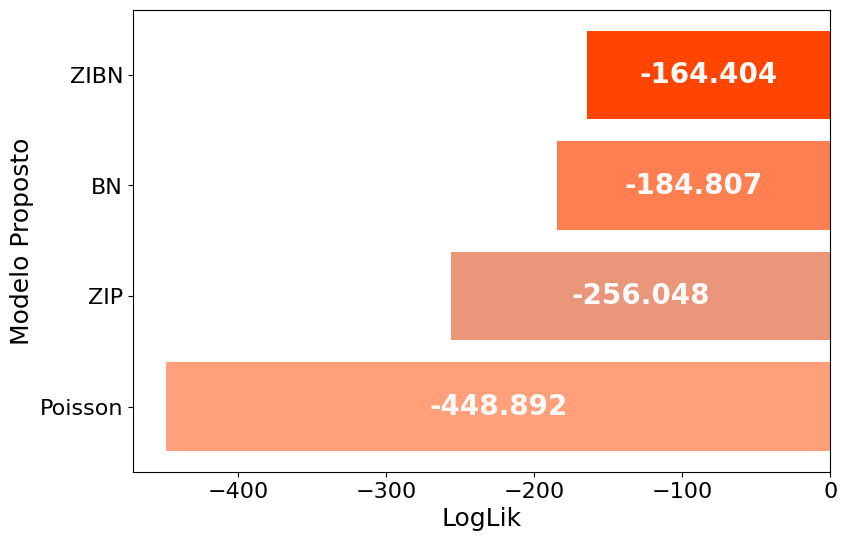

In [29]:
#%% Visualizando graficamente as loglik

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['ZIP','ZIBN', 'Poisson', 'BN'],
                       'loglik':[modelo_zip.llf, 
                                 modelo_zibn.llf, 
                                 modelo_poisson.llf, 
                                 modelo_bn.llf]}).sort_values(by=['loglik'])

# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(9,6))

c = ['lightsalmon', 'darksalmon', 'coral', 'orangered']

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='snow', fontsize=20, weight='bold')
ax.set_ylabel("Modelo Proposto", fontsize=18)
ax.set_xlabel("LogLik", fontsize=18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
plt.show()

In [30]:
#%% Realizando predições no modelo ZIBN

pred_zibn = modelo_zibn.predict(pd.DataFrame({'const': [1],
                                              'pop': [1.5]}),
                                exog_infl=pd.DataFrame({'const': [1],
                                                        'idade': [38],
                                                        'leiseca': [1]}))

print(f"Quant. Estimada de Acidentes por Semana: {round(pred_zibn[0], 2)}")

Quant. Estimada de Acidentes por Semana: 3.46


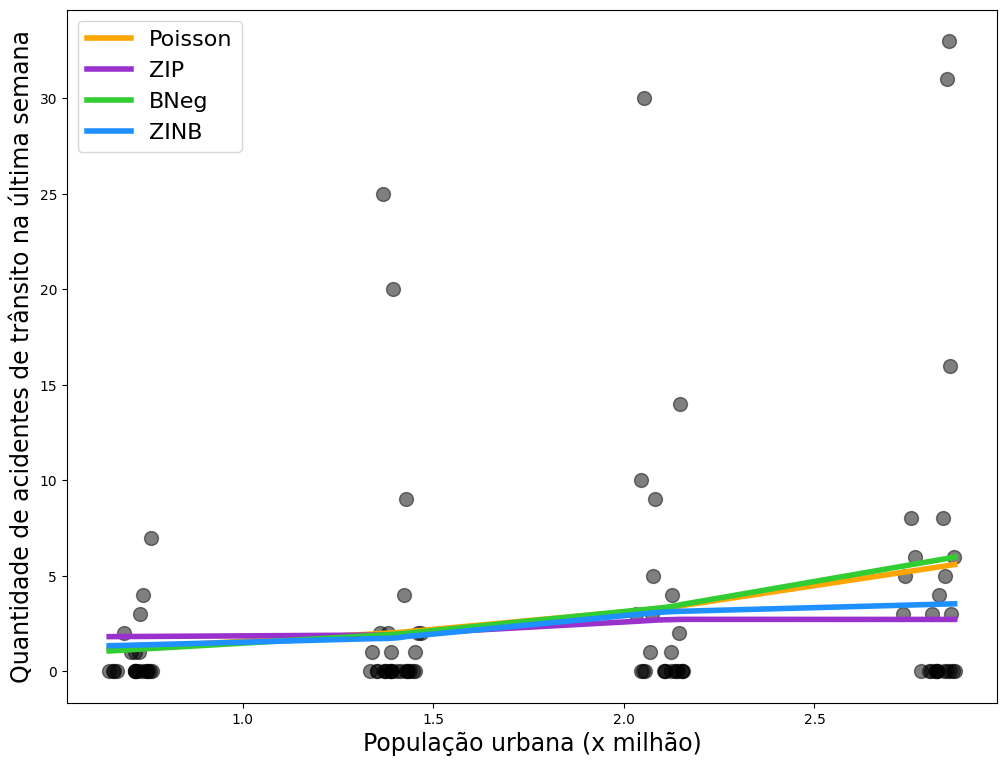

In [33]:
#%% Comparando as previsões dos modelos

plt.figure(figsize=(12,9))
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['poisson'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='Poisson',
            line_kws={'color':'orange', 'linewidth':4})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['poisson_zi'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='ZIP',
            line_kws={'color':'darkorchid', 'linewidth':4})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['bn'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='BNeg',
            line_kws={'color':'limegreen', 'linewidth':4})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['bn_zi'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='ZINB',
            line_kws={'color':'dodgerblue', 'linewidth':4})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['acidentes'],
            ci=None, marker='o', fit_reg=False,
            scatter_kws={'color':'black', 's':100, 'alpha':0.5})
plt.xlabel('População urbana (x milhão)', fontsize=17)
plt.ylabel('Quantidade de acidentes de trânsito na última semana', fontsize=17)
plt.legend(fontsize=16)
plt.show()

#%% Fim!